In [2]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

2025-01-21 16:39:35.174050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 16:39:36.787078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-21 16:39:37.215002: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 16:39:39.841161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-21 16:40:52.754463: W tensorflow/compiler/tf2


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


## Datasets
The data can be downloaded from https://explore.data.humancellatlas.org/projects/cc95ff89-2e68-4a08-a234-480eca21ce79/get-curl-command

In [2]:
adata1=ov.read('data/20492a4b-0def-457b-9574-60dfdde2a0f2/BM_standard_design.h5ad')
adata1

AnnData object with n_obs × n_vars = 266271 × 26911
    obs: 'n_genes', 'Channel', 'n_counts', 'percent_mito', 'scale', 'Group', 'leiden_labels', 'Donor', 'doublet_score', 'pred_dbl', 'leiden_labels_split', 'anno'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    uns: 'Channels', 'Groups', 'PCs', 'W_pca_harmony', 'c2gid', 'df_qcplot', 'genome', 'gncells', 'leiden_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'de_res', 'gmeans', 'gstds', 'means', 'partial_sum'

In [3]:
adata1.X.max()

11.266039

In [4]:
import scanpy as sc
sc.pp.subsample(adata1,fraction=0.3)
adata1

AnnData object with n_obs × n_vars = 79881 × 26911
    obs: 'n_genes', 'Channel', 'n_counts', 'percent_mito', 'scale', 'Group', 'leiden_labels', 'Donor', 'doublet_score', 'pred_dbl', 'leiden_labels_split', 'anno'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    uns: 'Channels', 'Groups', 'PCs', 'W_pca_harmony', 'c2gid', 'df_qcplot', 'genome', 'gncells', 'leiden_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'de_res', 'gmeans', 'gstds', 'means', 'partial_sum'

<AxesSubplot: title={'center': 'Donor'}, xlabel='X_umap1', ylabel='X_umap2'>

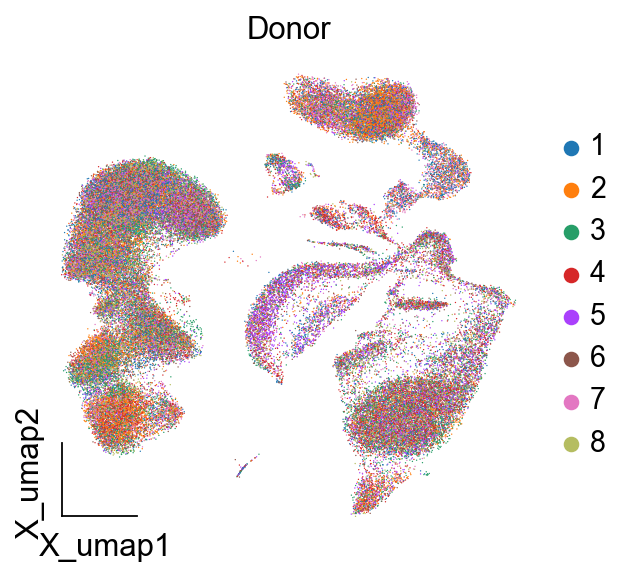

In [5]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color='Donor',
    frameon='small',
    show=False,
   # vmax=2500,
    #title='UMIs(Detected Genes)'
)

<AxesSubplot: title={'center': 'anno'}, xlabel='X_umap1', ylabel='X_umap2'>

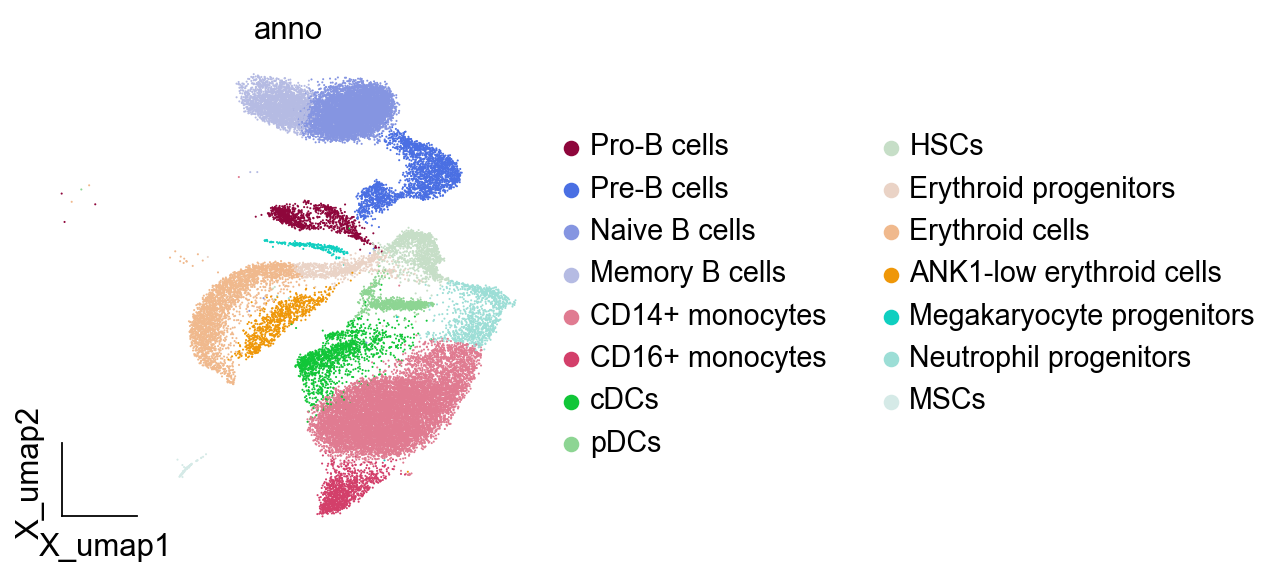

In [10]:
ov.pl.embedding(
    adata1[~adata1.obs['anno'].isin(['CD4+ naive T cells',
                                   'T helper cells',
                                   'CD8+ naive T cells',
                                   'Cytotoxic T cells',
                                   'NK cells',
                                    'Plasma cells'])],
    basis='X_umap',
    color='anno',
    frameon='small',
    show=False,
   # vmax=2500,
    #title='UMIs(Detected Genes)'
)

In [23]:
adata1=adata1[~adata1.obs['anno'].isin(['CD4+ naive T cells',
                                   'T helper cells',
                                   'CD8+ naive T cells',
                                   'Cytotoxic T cells',
                                   'NK cells',
                                    'Plasma cells',
                                        'Pro-B cells',
                                       'Pre-B cells',
                                       'Naive B cells',
                                       'Memory B cells'])]
adata1

View of AnnData object with n_obs × n_vars = 21558 × 2000
    obs: 'n_genes', 'Channel', 'n_counts', 'percent_mito', 'scale', 'Group', 'leiden_labels', 'Donor', 'doublet_score', 'pred_dbl', 'leiden_labels_split', 'anno', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank', 'highly_variable'
    uns: 'Channels', 'Donor_colors', 'Groups', 'PCs', 'W_pca_harmony', 'anno_colors', 'c2gid', 'df_qcplot', 'genome', 'gncells', 'leiden_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'S_BE_basis', 'S_TE_basis', 'denoised|original|pca_var_ratios', 'denoised|original|cum_sum_eigenvalues', 'neighbors', 'le

In [12]:
adata1.write('data/BM_multi.h5ad',compression='gzip')

## Batch correction with CellANOVA

In [3]:
adata1=ov.read('data/BM_multi.h5ad',compression='gzip')

In [4]:
adata1=adata1[:,adata1.var['highly_variable_features']==True]
adata1

View of AnnData object with n_obs × n_vars = 34496 × 2000
    obs: 'n_genes', 'Channel', 'n_counts', 'percent_mito', 'scale', 'Group', 'leiden_labels', 'Donor', 'doublet_score', 'pred_dbl', 'leiden_labels_split', 'anno'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    uns: 'Channels', 'Donor_colors', 'Groups', 'PCs', 'W_pca_harmony', 'anno_colors', 'c2gid', 'df_qcplot', 'genome', 'gncells', 'leiden_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'de_res', 'gmeans', 'gstds', 'means', 'partial_sum'

In [5]:
ov.pp.scale(adata1)
ov.pp.pca(adata1,layer='scaled',n_pcs=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:08)


In [6]:
## construct control pool
control_dict = {
    'pool1': ['1','2'],
}

ov.single.batch_correction(adata1,batch_key='Donor',n_pcs=50,
                           methods='CellANOVA',control_dict=control_dict)
adata1

...Begin using CellANOVA to correct batch effect
computing PCA
    with n_comps=70
    finished (0:00:09)


2025-01-21 16:42:56,447 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-01-21 16:43:01,973 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-01-21 16:43:02,218 - harmonypy - INFO - Iteration 1 of 30
2025-01-21 16:43:15,702 - harmonypy - INFO - Iteration 2 of 30
2025-01-21 16:43:29,307 - harmonypy - INFO - Iteration 3 of 30
2025-01-21 16:43:43,480 - harmonypy - INFO - Iteration 4 of 30
2025-01-21 16:43:57,505 - harmonypy - INFO - Iteration 5 of 30
2025-01-21 16:44:02,384 - harmonypy - INFO - Converged after 5 iterations
100%|██████████| 8/8 [00:01<00:00,  5.50it/s]


computing PCA
    with n_comps=50
    finished (0:00:39)


AnnData object with n_obs × n_vars = 34496 × 2000
    obs: 'n_genes', 'Channel', 'n_counts', 'percent_mito', 'scale', 'Group', 'leiden_labels', 'Donor', 'doublet_score', 'pred_dbl', 'leiden_labels_split', 'anno'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank', 'highly_variable'
    uns: 'Channels', 'Donor_colors', 'Groups', 'PCs', 'W_pca_harmony', 'anno_colors', 'c2gid', 'df_qcplot', 'genome', 'gncells', 'leiden_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'S_BE_basis', 'S_TE_basis', 'denoised|original|pca_var_ratios', 'denoised|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'scaled|original|X_pca', 'Cmat', 'denoised|original|X_pca', 'X_cellanova'
    varm: 'de_res', 'gmeans', 'gst

In [9]:
adata1.write('data/BM_multi_cellanova.h5ad',compression='gzip')

In [47]:
ov.pp.neighbors(adata1,use_rep='X_cellanova')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [48]:
ov.pp.umap(adata1)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:10)


[<AxesSubplot: title={'center': 'Donor'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'anno'}, xlabel='X_umap1', ylabel='X_umap2'>]

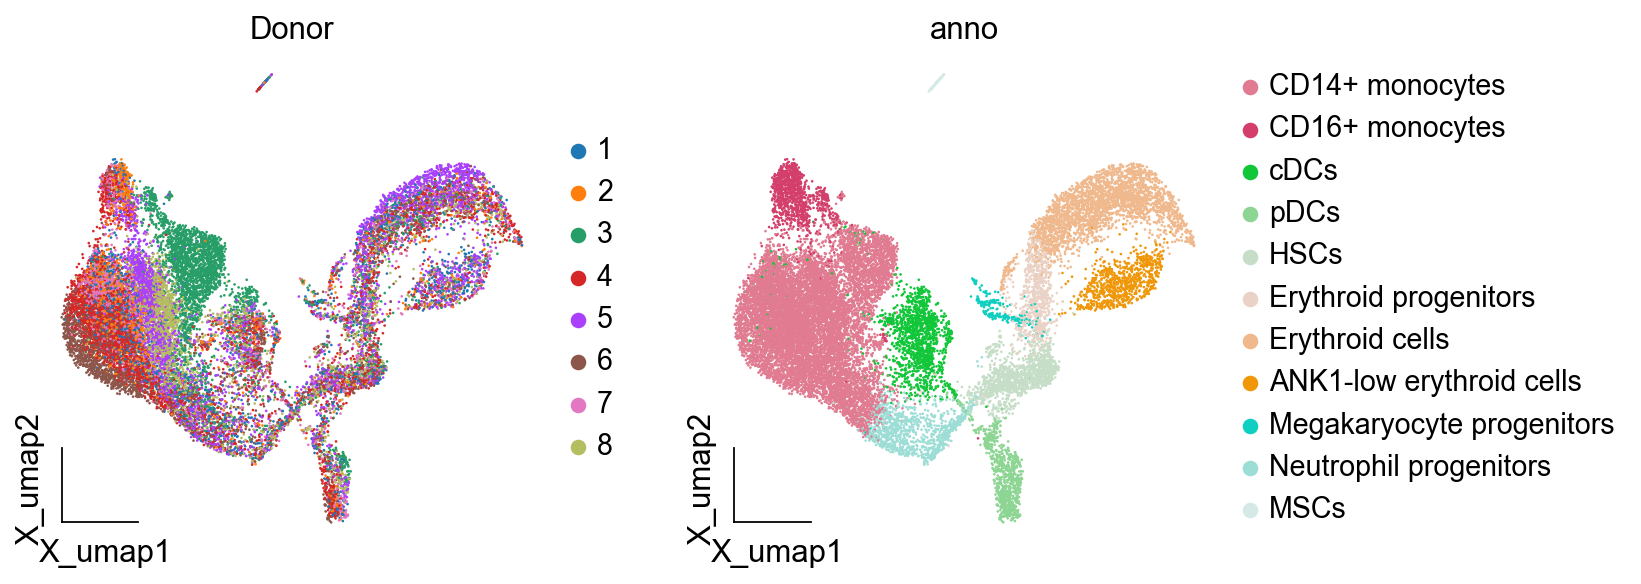

In [49]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color=['Donor','anno'],
    frameon='small',
    show=False,
   # vmax=2500,
    #title='UMIs(Detected Genes)'
)

## LTNN time

In [10]:
adata1.layers['lognorm']=adata1.X

In [62]:
adata1.X=adata1.layers['lognorm']

In [63]:
adata1.X.min(),adata1.X.max()

(0.0, 10.812323)

In [64]:
ov.utils.lsi(adata1, n_components=20, n_iter=15)

In [65]:
adata1.X=adata1.layers['denoised']

In [66]:
adata1.X.min(),adata1.X.max()

(-7.046707, 10.625079)

In [67]:
#import scltnn
ltnn_obj=ov.single.scLTNN(adata1,basis='X_lsi',input_dim=20,)

In [69]:
ltnn_obj.ANNmodel_load('../LTNN/model/model_human.h5')
ltnn_obj.cal_paga(use_rep='X_cellanova',resolution=1)
ltnn_obj.cal_model_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time


In [70]:
ltnn_obj.cal_exp_gene_value(rev=False,mode='ann')

filtered out 16 cells that have less than 200 genes expressed
filtered out 3 genes that are detected in less than 3 cells
gene in p_time_low -0.882264 gene in p_time_high -0.23714274


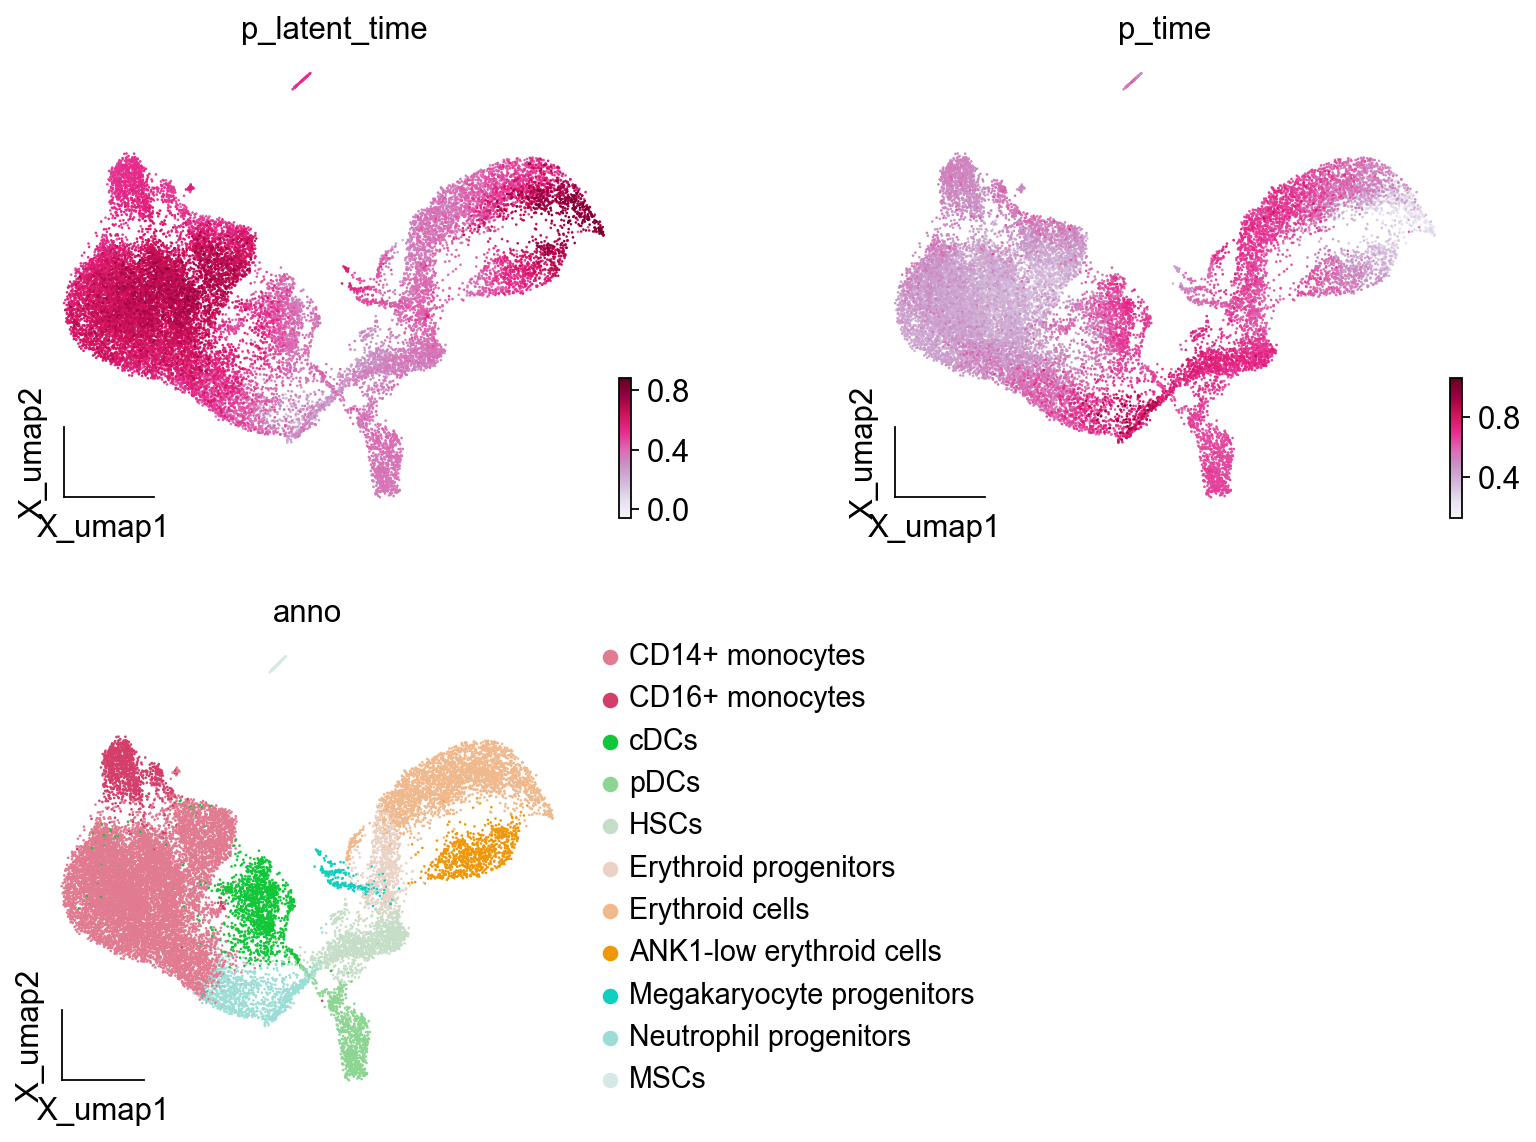

In [71]:
ov.utils.embedding(adata1,basis='X_umap', 
                   color=['p_latent_time','p_time','anno'], 
               cmap='PuRd',legend_loc='right margin',frameon='small',ncols=2,wspace=0.4)

<AxesSubplot: title={'center': 'leiden'}, xlabel='X_umap1', ylabel='X_umap2'>

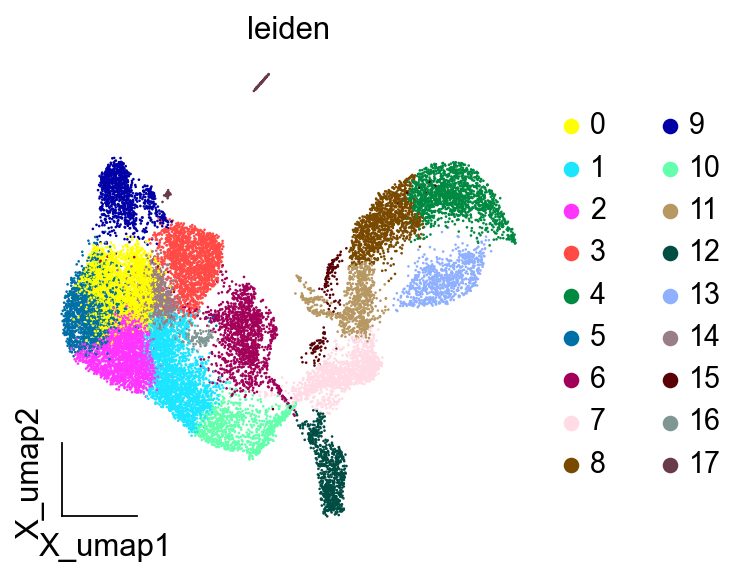

In [72]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color=['leiden'],
    frameon='small',
    show=False,
   # vmax=2500,
    #title='UMIs(Detected Genes)'
)

In [79]:
ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.01,leiden_range_mid=0.01,leiden_range_end=0.2)

......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99898815 0.9974052  0.9969113  0.9944813  0.9903148
     0.9880099  0.9865177  0.9850873  0.98321104 0.9808998  0.97543794
     0.97137815 0.9670614  0.9654307 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
......leiden_start: ['10', '7']
......leiden_middle ['2', '16', '0', '8', '14', '5', '3']
......leiden_end ['17', '1', '13', '4', '9']


In [80]:
ltnn_obj.ANN(batch_size=30,n_epochs=100,verbose=0)
ltnn_obj.cal_distrubute()
ltnn_obj.cal_scLTNN_time()

......ANN


ANN model: 100%|██████████| 100/100 [01:04<00:00,  1.55it/s, val loss, val mae=0.01230, 0.01230]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 3447.35] [loc=0.176 scale=0.067]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 5589.58] [loc=0.000 scale=0.176]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 5589.58] [loc=-134217728.000 scale=134217728.000]


......Dweibull analysis


[distfit] >INFO> [dweibull  ] [0.40 sec] [RSS: 475.297] [loc=0.188 scale=0.027]
[distfit] >INFO> [t         ] [0.47 sec] [RSS: 246.568] [loc=0.187 scale=0.013]
[distfit] >INFO> [genextreme] [0.38 sec] [RSS: 3917.79] [loc=0.148 scale=0.066]
[distfit] >INFO> [gamma     ] [0.23 sec] [RSS: 7479.21] [loc=-0.000 scale=0.486]
[distfit] >INFO> [lognorm   ] [0.18 sec] [RSS: 3441.33] [loc=-0.462 scale=0.636]
[distfit] >INFO> [beta      ] [0.41 sec] [RSS: 3452.49] [loc=-0.299 scale=89270.982]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5892.02] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.16 sec] [RSS: 3592.93] [loc=-32.292 scale=4.036]
[distfit] >INFO> [norm      ] [2.29 sec] [RSS: 3447.35] [loc=0.176 scale=0.067]
[distfit] >INFO> [expon     ] [2.29 sec] [RSS: 5589.58] [loc=0.000 scale=0.176]
[distfit] >INFO> [pareto    ] [2.29 sec] [RSS: 5589.58] [loc=-134217728.000 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [2.27 sec] [RSS: 475.297] [loc=0.188 scale=0.027]
[distfit] >INF

......Norm analysis


[distfit] >INFO> [dweibull  ] [0.39 sec] [RSS: 30.9136] [loc=0.505 scale=0.180]
[distfit] >INFO> [t         ] [1.14 sec] [RSS: 52.2143] [loc=0.566 scale=0.268]
[distfit] >INFO> [genextreme] [0.11 sec] [RSS: 55.0435] [loc=0.503 scale=0.294]
[distfit] >INFO> [gamma     ] [0.18 sec] [RSS: 52.0101] [loc=-7.205 scale=0.009]
[distfit] >INFO> [lognorm   ] [0.39 sec] [RSS: 52.138] [loc=-30.581 scale=31.146]
[distfit] >INFO> [beta      ] [0.32 sec] [RSS: 52.7651] [loc=-0.013 scale=1.054]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 55.0025] [loc=-0.013 scale=1.053]
[distfit] >INFO> [loggamma  ] [0.10 sec] [RSS: 52.739] [loc=-6.471 scale=1.831]
[distfit] >INFO> [norm      ] [2.68 sec] [RSS: 52.2143] [loc=0.566 scale=0.268]
[distfit] >INFO> [expon     ] [2.68 sec] [RSS: 67.4299] [loc=-0.013 scale=0.579]
[distfit] >INFO> [pareto    ] [2.68 sec] [RSS: 67.4299] [loc=-134217728.013 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [2.67 sec] [RSS: 30.9136] [loc=0.505 scale=0.180]
[distfit] >INFO> 

......calculate scLTNN time


[<AxesSubplot: title={'center': 'LTNN_time'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'anno'}, xlabel='X_umap1', ylabel='X_umap2'>]

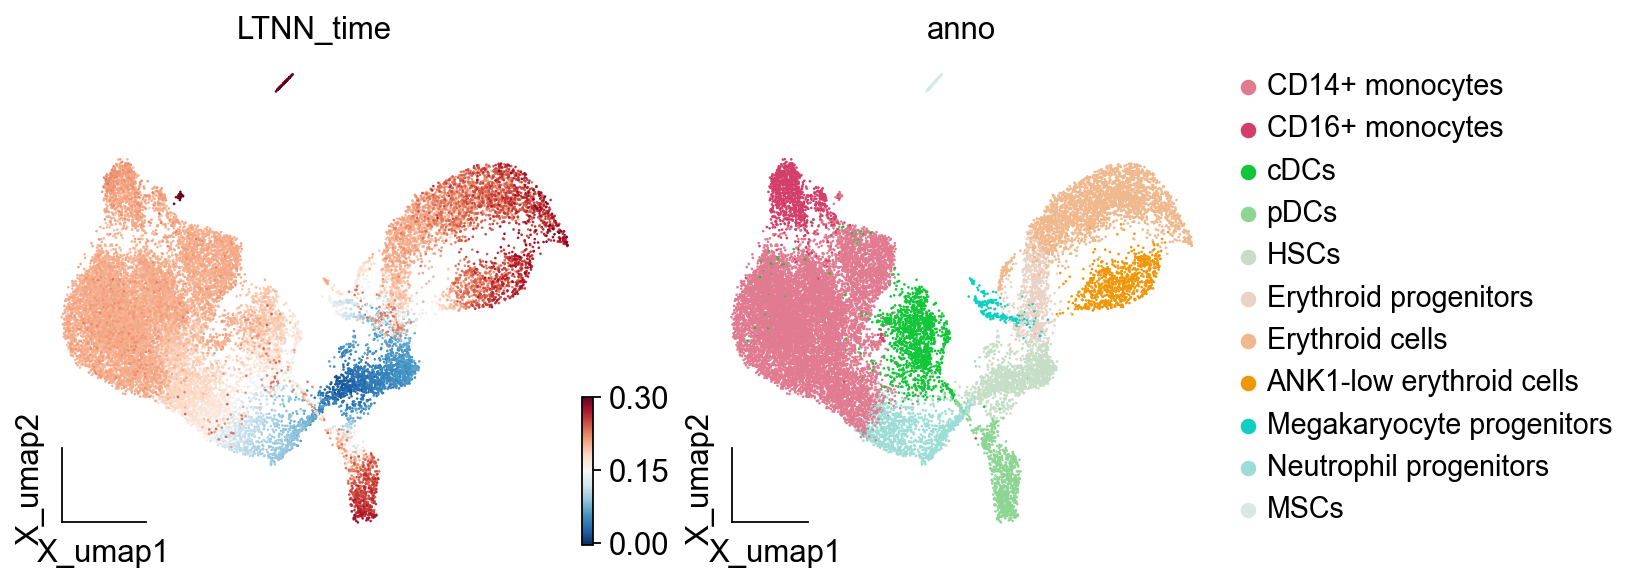

In [82]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color=['LTNN_time','anno'],
    frameon='small',
    show=False,
    vmax=0.3
   # vmax=2500,
    #title='UMIs(Detected Genes)'
)

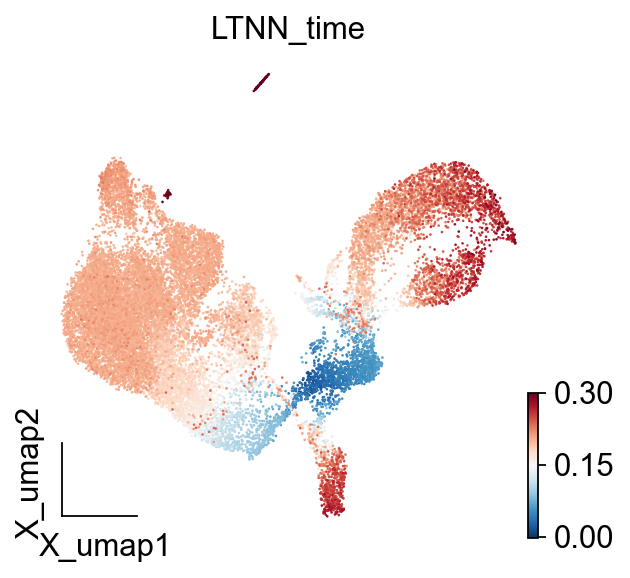

In [86]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color='LTNN_time',
    frameon='small',
    show=False,
     vmax=0.3
    #vmax=2500,
   # title='UMIs(Detected Genes)'
)
ov.plt.savefig("figures/review/hsc_human_multi_ltnntime.png",dpi=300,bbox_inches = 'tight')

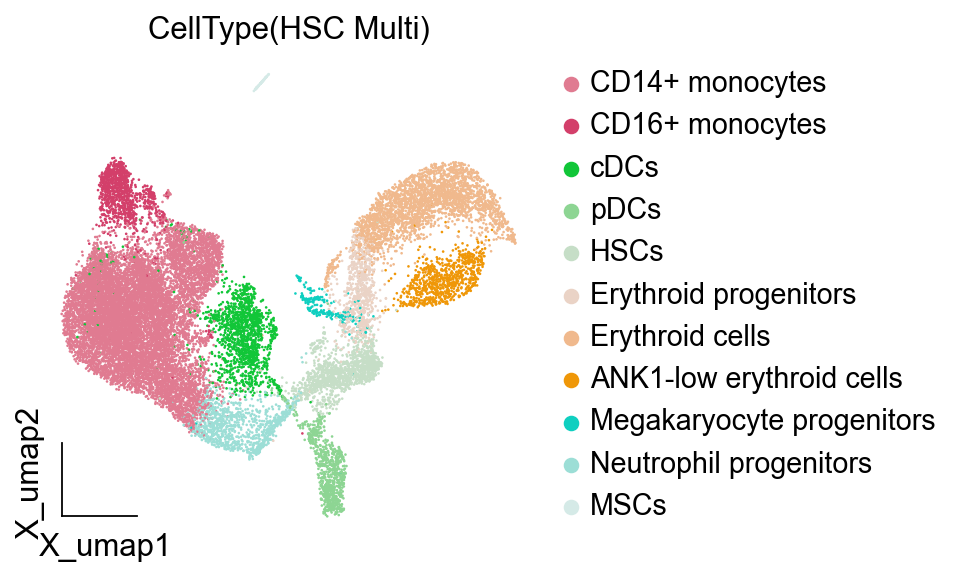

In [87]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color='anno',
    frameon='small',
    show=False,
    #vmax=2500,
   title='CellType(HSC Multi)'
)
ov.plt.savefig("figures/review/hsc_human_multi_anno.png",dpi=300,bbox_inches = 'tight')

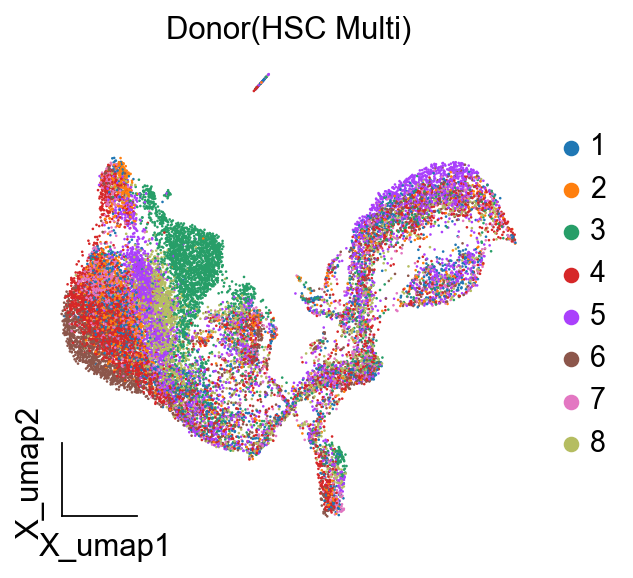

In [88]:
ov.pl.embedding(
    adata1,
    basis='X_umap',
    color='Donor',
    frameon='small',
    show=False,
    #vmax=2500,
   title='Donor(HSC Multi)'
)
ov.plt.savefig("figures/review/hsc_human_multi_anno.png",dpi=300,bbox_inches = 'tight')

In [90]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [91]:
import scvelo as scv
scv.tl.paga(ltnn_obj.adata, groups='anno',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


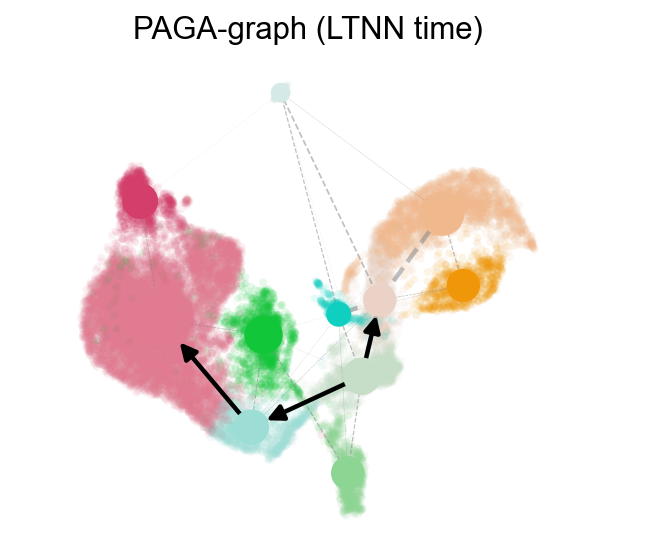

In [92]:
#fig, ax = plt.subplots(figsize=(3,3))
ax=scv.pl.paga(ltnn_obj.adata, basis='umap', size=50, alpha=.1,title='PAGA-graph (LTNN_time)',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
ov.plt.savefig("figures/review/hsc_human_multi_paga.png",dpi=300,bbox_inches = 'tight')